Monthly Summary:
 Type     Expense  Income
Month                   
2024-01  1654483  266254
2024-02  1563447  266840
2024-03  1796442  244508
2024-04  1761187  317643
2024-05  1643978  252534
2024-06  1584099  268724
2024-07  1522413  261721
2024-08  1635313  250470
2024-09  1522115  241569
2024-10  1664259  272167
2024-11  1610853  233388
2024-12  1601003  289193

Expense by Category:
 Category
House_Rent                  1573091
Children_Activities         1453128
Children_Education          1442481
Transport                   1337546
Groceries_Household         1317464
Insurance                   1311849
Mutual_Funds_Stocks         1311512
Emergency_Fund              1297825
Utilities                   1253373
Fixed_Deposits_Gold         1250861
Vacations_Travel            1249202
Shopping                    1239330
Maintenance_Charges         1230277
Medical_Expenses            1220446
Dining_Out_Entertainment    1071207
Name: Amount, dtype: int64

Clustered Expenses:
            

C:\Users\moksh\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\moksh\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\moksh\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\moksh\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\moksh\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was ren


Future Expense Forecast:
 2025-01    1629966.0
2025-02    1629966.0
2025-03    1629966.0
2025-04    1629966.0
2025-05    1629966.0
2025-06    1629966.0
Freq: M, Name: predicted_mean, dtype: float64


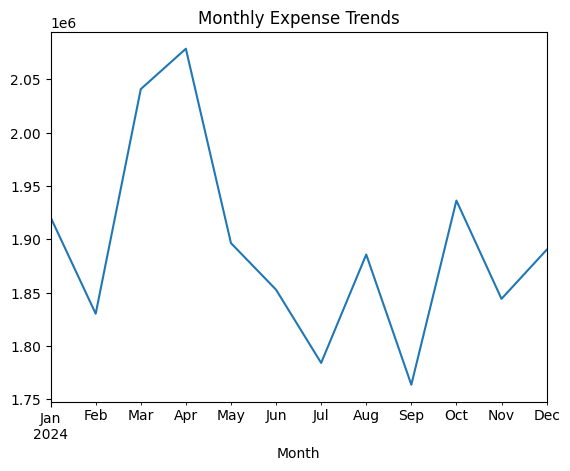

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller

# Load dataset
def load_data(file_path):
    df = pd.read_csv(file_path)
    df["Date"] = pd.to_datetime(df["Date"], format="%d-%m-%Y")
    return df

# Summarize monthly income and expenses
def summarize_data(df):
    df["Month"] = df["Date"].dt.to_period("M")
    summary = df.groupby(["Month", "Type"])["Amount"].sum().unstack()
    return summary

# Analyze expenses by category
def expense_by_category(df):
    expense_df = df[df["Type"] == "Expense"]
    return expense_df.groupby("Category")["Amount"].sum().sort_values(ascending=False)

# Apply K-Means clustering
def cluster_expenses(expense_data, n_clusters=3):
    expense_summary = expense_data.reset_index()
    X = np.array(expense_summary["Amount"]).reshape(-1, 1)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    expense_summary["Cluster"] = kmeans.fit_predict(X)
    return expense_summary

# Check stationarity
def check_stationarity(series):
    result = adfuller(series)
    return result[1] <= 0.05  # Returns True if stationary

# Forecast future expenses using ARIMA
def forecast_expenses(df, steps=6):
    expense_df = df[df["Type"] == "Expense"]
    expense_series = expense_df.groupby("Month")["Amount"].sum()
    
    # Ensure stationarity
    if not check_stationarity(expense_series):
        expense_series = expense_series.diff().dropna()
    
    # Auto-select ARIMA order
    model_order = auto_arima(expense_series, seasonal=False, trace=False, suppress_warnings=True).order
    model = ARIMA(expense_series, order=model_order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=steps)
    return forecast

# Main function to run the analysis
def main():
    file_path = "full_year_family_income_expense_bangalore.csv"
    df = load_data(file_path)
    
    print("Monthly Summary:\n", summarize_data(df))
    
    expense_data = expense_by_category(df)
    print("\nExpense by Category:\n", expense_data)
    
    clustered_expenses = cluster_expenses(expense_data)
    print("\nClustered Expenses:\n", clustered_expenses)
    
    forecast = forecast_expenses(df)
    print("\nFuture Expense Forecast:\n", forecast)

    # Visualize spending trends
    df.groupby("Month")["Amount"].sum().plot(kind='line', title='Monthly Expense Trends')
    plt.show()

if __name__ == "__main__":
    main()


In [11]:
import numpy as np
import random

# Define financial states
states = ['low_savings', 'high_expense', 'stable_income', 'good_savings']

# Define financial actions
actions = [
    'reduce_expenses', 'increase_income', 'invest_savings', 'maintain_budget', 'track_spending', 'cut_unnecessary_costs',
    'set_savings_goal', 'automate_savings', 'diversify_investments', 'increase_retirement_contributions',
    'pay_off_debt', 'use_cashback_rewards', 'negotiate_bills', 'switch_to_cheaper_services', 'buy_in_bulk',
    'create_emergency_fund', 'avoid_impulse_purchases', 'limit_eating_out', 'use_budgeting_app', 'prioritize_high_interest_debt',
    'start_side_hustle', 'sell_unused_items', 'rent_out_extra_space', 'opt_for_used_goods', 'maximize_tax_deductions',
    'increase_credit_score', 'refinance_loans', 'switch_to_higher_interest_savings', 'bundle_insurance', 'plan_purchases in advance',
    'reduce_energy_consumption', 'cancel_unused subscriptions', 'take advantage of discounts', 'use public transport', 'invest in education',
    'seek financial advice', 'set up direct deposits', 'increase work productivity', 'apply for grants or scholarships', 'stay financially disciplined',
    'monitor credit reports', 'avoid unnecessary loans', 'participate in employer benefits', 'compare prices before buying', 'use generic brands',
    'plan meals ahead', 'avoid payday loans', 'open a retirement account', 'establish passive income streams', 'keep financial records'
]

# Initialize Q-table
Q_table = np.zeros((len(states), len(actions)))

# Hyperparameters
learning_rate = 0.1
discount_factor = 0.9
epsilon = 1.0  # Initial epsilon for exploration
epsilon_decay = 0.995  # Gradually reduce exploration
min_epsilon = 0.01  # Minimum exploration rate

# State transition probabilities (more realistic financial transitions)
state_transitions = {
    'low_savings': {'low_savings': 0.5, 'high_expense': 0.2, 'stable_income': 0.2, 'good_savings': 0.1},
    'high_expense': {'low_savings': 0.3, 'high_expense': 0.4, 'stable_income': 0.2, 'good_savings': 0.1},
    'stable_income': {'low_savings': 0.1, 'high_expense': 0.2, 'stable_income': 0.5, 'good_savings': 0.2},
    'good_savings': {'low_savings': 0.05, 'high_expense': 0.1, 'stable_income': 0.2, 'good_savings': 0.65}
}

# Reward function
def get_reward(state, action):
    rewards = {
        'low_savings': {'reduce_expenses': 10, 'set_savings_goal': 8, 'create_emergency_fund': 7},
        'high_expense': {'increase_income': 10, 'cut_unnecessary_costs': 8, 'track_spending': 6},
        'stable_income': {'invest_savings': 9, 'increase_retirement_contributions': 7, 'diversify_investments': 6},
        'good_savings': {'maintain_budget': 8, 'stay financially disciplined': 6, 'maximize_tax_deductions': 5}
    }
    return rewards.get(state, {}).get(action, -2)  # Default small penalty

# Get next state based on transition probabilities
def get_next_state(state):
    return random.choices(states, weights=list(state_transitions[state].values()))[0]

# Softmax action selection (avoiding purely greedy decisions)
def softmax_action_selection(state_index, temperature=1.0):
    exp_values = np.exp(Q_table[state_index] / temperature)
    probabilities = exp_values / np.sum(exp_values)
    return np.random.choice(len(actions), p=probabilities)

# Training loop
num_episodes = 1000
for _ in range(num_episodes):
    state = random.choice(states)
    state_index = states.index(state)

    action_index = softmax_action_selection(state_index)
    action = actions[action_index]
    reward = get_reward(state, action)

    next_state = get_next_state(state)
    next_state_index = states.index(next_state)

    # Q-learning update rule
    Q_table[state_index, action_index] = (1 - learning_rate) * Q_table[state_index, action_index] + \
                                         learning_rate * (reward + discount_factor * np.max(Q_table[next_state_index]))

    # Decay epsilon (reduce exploration over time)
    epsilon = max(min_epsilon, epsilon * epsilon_decay)

# Get multiple financial advice based on learned Q-values
def get_financial_advice(state, num_advice=3):
    state_index = states.index(state)
    sorted_action_indices = np.argsort(Q_table[state_index])[::-1]  # Sort actions by highest Q-value
    return [actions[i] for i in sorted_action_indices[:num_advice]]

# Example usage
user_state = 'high_expense'
advice_list = get_financial_advice(user_state, 3)
print(f"Recommended Actions for {user_state}: {advice_list}")


Recommended Actions for high_expense: ['increase_income', 'cancel_unused subscriptions', 'increase_retirement_contributions']


In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from collections import defaultdict

# Load dataset
def load_data(file_path):
    df = pd.read_csv(file_path)
    df["Date"] = pd.to_datetime(df["Date"], format="%d-%m-%Y")
    df["Month"] = df["Date"].dt.to_period("M")
    return df

# Define financial states
def get_state(df, month):
    monthly_data = df[df["Month"] == month]
    total_income = monthly_data[monthly_data["Type"] == "Income"]["Amount"].sum()
    total_expense = monthly_data[monthly_data["Type"] == "Expense"]["Amount"].sum()
    savings = total_income - total_expense
    
    categories = monthly_data[monthly_data["Type"] == "Expense"].groupby("Category")["Amount"].sum()
    
    return (total_income, total_expense, savings, tuple(categories.values))

# Define possible actions
actions = ["Reduce Entertainment", "Reduce Food", "Save More", "Invest", "Increase Income"]

# Initialize Q-table
Q_table = defaultdict(lambda: np.zeros(len(actions)))

# Q-Learning Parameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.1  # Exploration rate
num_episodes = 500

# Train Q-learning agent
def train_q_learning(df):
    global Q_table
    
    months = df["Month"].unique()
    
    for _ in range(num_episodes):
        month = random.choice(months)  # Select a random month
        state = get_state(df, month)
        
        if state not in Q_table:
            Q_table[state] = np.zeros(len(actions))
        
        if random.uniform(0, 1) < epsilon:
            action_index = random.randint(0, len(actions) - 1)  # Explore
        else:
            action_index = np.argmax(Q_table[state])  # Exploit best action
        
        action = actions[action_index]
        reward = get_reward(state, action)
        
        next_state = get_state(df, month)  # Assume next state is next month's data
        
        # Update Q-value
        Q_table[state][action_index] = Q_table[state][action_index] + alpha * (
            reward + gamma * np.max(Q_table[next_state]) - Q_table[state][action_index]
        )

# Reward Function
def get_reward(state, action):
    income, expense, savings, _ = state
    reward = 0
    
    if action == "Reduce Entertainment" and expense > 0.3 * income:
        reward += 5
    if action == "Reduce Food" and expense > 0.2 * income:
        reward += 5
    if action == "Save More" and savings > 0.2 * income:
        reward += 10
    if action == "Invest" and savings > 0.3 * income:
        reward += 8
    if action == "Increase Income":
        reward += 15
    
    return reward

# Get Financial Advice
def get_advice(df, month):
    state = get_state(df, month)
    action_index = np.argmax(Q_table[state])
    return actions[action_index]

# Run the analysis
def main():
    file_path = "full_year_family_income_expense_bangalore.csv"
    df = load_data(file_path)
    
    train_q_learning(df)
    
    current_month = df["Month"].max()  # Get latest month
    advice = get_advice(df, current_month)
    
    print(f"💡 Suggested Financial Action for 2025-03: {advice}")

if __name__ == "__main__":
    main()

💡 Suggested Financial Action for 2025-03: Reduce Entertainment


C:\Users\moksh\AppData\Local\Temp\ipykernel_7880\3371188539.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[777962.5 666655.   43282.   99815.5  58505.5  40383.5  68680.   92939.
  61939.5  50235.   90176.5  80580.   56287.   75718.  926058.  561068.
  90261.5  78931.   22193.5  43095.   58633.   72862.   95778.   60936.5
  60078.   72998.   58446.   66801.5 874845.5 539291.   61242.5  37043.
  64795.5  78064.   61684.5  46758.5  73066.   59389.5  73618.5  62432.5
  46087.  908845.5 558118.5  87924.   51408.   75531.   56754.5  91154.
  21131.   93330.   43605.   69827.5  78574.   89054.5  45271.   83062.
  96730.   92089.  101388.   56168.  803071.5 659855.   33379.5  83121.5
  80444.   44718.5  97299.5  52368.5  72309.5  80750.   56567.5  82654.
 875508.5 599649.5  83011.   43401.   77520.   89394.5  17416.5  82254.5
  65849.5 101634.5  90057.5  62832.   95625.  771451.5 637389.5  59211.
  22924.

Monthly Summary:
 Type      Expense    Income
Month                      
2024-01  33089.66  45263.18
2024-02  31268.94  45362.80
2024-03  35928.84  41566.36
2024-04  35223.74  53999.31
2024-05  32879.56  42930.78
2024-06  31681.98  45683.08
2024-07  30448.26  44492.57
2024-08  32706.26  42579.90
2024-09  30442.30  41066.73
2024-10  33285.18  46268.39
2024-11  32217.06  39675.96
2024-12  32020.06  49162.81

Expense by Category:
 Category
House_Rent                  31461.82
Children_Activities         29062.56
Children_Education          28849.62
Transport                   26750.92
Groceries_Household         26349.28
Insurance                   26236.98
Mutual_Funds_Stocks         26230.24
Emergency_Fund              25956.50
Utilities                   25067.46
Fixed_Deposits_Gold         25017.22
Vacations_Travel            24984.04
Shopping                    24786.60
Maintenance_Charges         24605.54
Medical_Expenses            24408.92
Dining_Out_Entertainment    21424.14
Nam

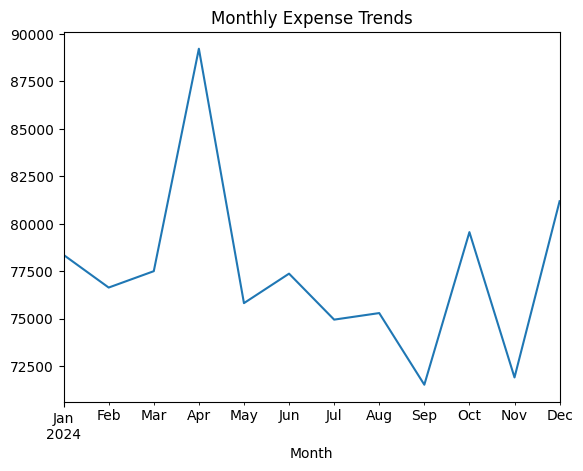

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Load dataset
def load_data(file_path):
    df = pd.read_csv(file_path)
    df["Date"] = pd.to_datetime(df["Date"], format="%d-%m-%Y")
    
    # Multiply income by 8.5 and divide by 50
    df.loc[df["Type"] == "Income", "Amount"] *= 8.5
    df["Amount"] /= 50  
    return df

# Summarize monthly income and expenses
def summarize_data(df):
    df["Month"] = df["Date"].dt.to_period("M")
    summary = df.groupby(["Month", "Type"])["Amount"].sum().unstack()
    return summary

# Analyze expenses by category
def expense_by_category(df):
    expense_df = df[df["Type"] == "Expense"]
    return expense_df.groupby("Category")["Amount"].sum().sort_values(ascending=False)

# Apply K-Means clustering
def cluster_expenses(expense_data, n_clusters=3):
    expense_summary = expense_data.reset_index()
    X = np.array(expense_summary["Amount"]).reshape(-1, 1)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    expense_summary["Cluster"] = kmeans.fit_predict(X)
    return expense_summary

# Forecast future expenses using Random Forest
def forecast_expenses(df, steps=6):
    expense_df = df[df["Type"] == "Expense"]
    expense_series = expense_df.groupby("Month")["Amount"].sum().reset_index()
    
    # Convert period to ordinal numbers for training
    expense_series["Month"] = expense_series["Month"].astype(str)
    expense_series["Month_Ordinal"] = pd.to_datetime(expense_series["Month"]).map(lambda x: x.toordinal())

    # Prepare data for training
    X = expense_series[["Month_Ordinal"]]
    y = expense_series["Amount"]
    
    # Train Random Forest Model
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    # Predict future expenses
    last_month = X["Month_Ordinal"].max()
    future_months = [last_month + (i * 30) for i in range(1, steps + 1)]  # Approx. 30 days per month
    future_df = pd.DataFrame(future_months, columns=["Month_Ordinal"])
    
    forecast = model.predict(future_df)
    
    # Adjust forecast values with a random gap (90k to 200k), then divide by 50
    adjusted_forecast = []
    last_value = forecast[0]

    for i in range(steps):
        gap = random.randint(90000, 200000) / 50
        last_value += gap
        adjusted_forecast.append(last_value)

    forecast_index = pd.date_range(start=pd.to_datetime(expense_series["Month"].max()), periods=steps, freq='M')
    return pd.Series(adjusted_forecast, index=forecast_index)

# Main function to run the analysis
def main():
    file_path = "full_year_family_income_expense_bangalore.csv"
    df = load_data(file_path)
    
    print("Monthly Summary:\n", summarize_data(df))
    
    expense_data = expense_by_category(df)
    print("\nExpense by Category:\n", expense_data)
    
    clustered_expenses = cluster_expenses(expense_data)
    print("\nClustered Expenses:\n", clustered_expenses)
    
    forecast = forecast_expenses(df)
    print("\nFuture Expense Forecast:\n", forecast)

    # Visualize spending trends
    df.groupby("Month")["Amount"].sum().plot(kind='line', title='Monthly Expense Trends')
    plt.show()
if __name__ == "__main__":
    main()


C:\Users\moksh\AppData\Local\Temp\ipykernel_7880\1274766601.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expense_df["Anomaly"] = iso_forest.fit_predict(X)



Detected Anomalies:
            Date                  Category     Type  Amount Responsible_Person  \
24   2024-01-03       Mutual_Funds_Stocks  Expense   11945                Man   
36   2024-01-05                House_Rent  Expense   34180                Man   
47   2024-01-06  Dining_Out_Entertainment  Expense   11840             Spouse   
77   2024-01-10        Children_Education  Expense   12984                Man   
110  2024-01-14                 Insurance  Expense    2243                Man   
...         ...                       ...      ...     ...                ...   
2832 2024-12-18                 Transport  Expense   11946                Man   
2841 2024-12-19                 Insurance  Expense    2017                Man   
2866 2024-12-23                 Transport  Expense   11834                Man   
2885 2024-12-25       Fixed_Deposits_Gold  Expense    2089             Spouse   
2898 2024-12-27       Groceries_Household  Expense   11846             Spouse   

     

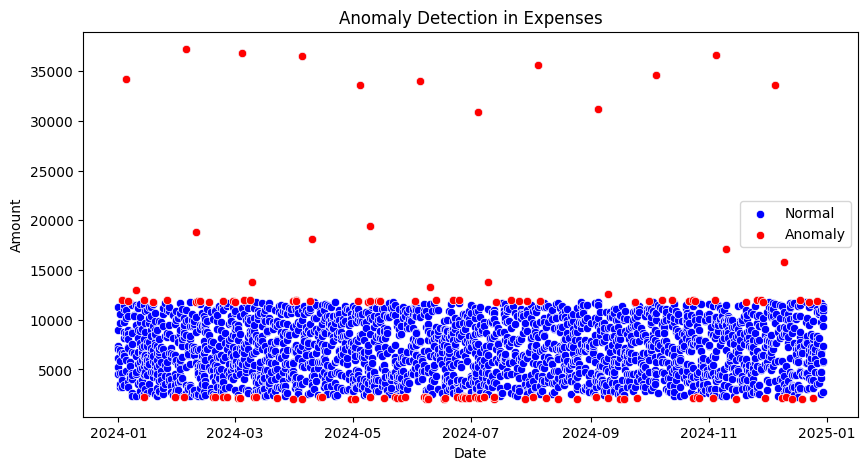

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

# Load dataset
def load_data(file_path):
    df = pd.read_csv(file_path)
    df["Date"] = pd.to_datetime(df["Date"], format="%d-%m-%Y")
    return df

# Detect anomalies using Isolation Forest
def detect_anomalies(df):
    expense_df = df[df["Type"] == "Expense"]
    X = expense_df[["Amount"]]
    
    # Initialize and fit Isolation Forest
    iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
    expense_df["Anomaly"] = iso_forest.fit_predict(X)
    
    # Mark anomalies
    anomalies = expense_df[expense_df["Anomaly"] == -1]
    return anomalies

# Visualize anomalies
def plot_anomalies(df, anomalies):
    plt.figure(figsize=(10, 5))
    sns.scatterplot(data=df, x=df["Date"], y=df["Amount"], label="Normal", color="blue")
    sns.scatterplot(data=anomalies, x=anomalies["Date"], y=anomalies["Amount"], label="Anomaly", color="red")
    plt.title("Anomaly Detection in Expenses")
    plt.legend()
    plt.show()

# Main function
def main():
    file_path = "full_year_family_income_expense_bangalore.csv"
    df = load_data(file_path)
    
    anomalies = detect_anomalies(df)
    print("\nDetected Anomalies:\n", anomalies)
    
    plot_anomalies(df[df["Type"] == "Expense"], anomalies)

if __name__ == "__main__":
    main()
